 ### About Dataset

#### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more








 ### Content

### Column Descriptions:

`id` (Unique id for each patient)

`age` (Age of the patient in years)

`origin` (place of study)

`sex` (Male/Female)

`cp chest pain type` ([typical angina, atypical angina, non-anginal, asymptomatic])

`trestbps resting blood pressure` (resting blood pressure (in mm Hg on admission to the hospital))

`'chol'` (serum cholesterol in mg/dl)


`fbs` (if fasting blood sugar > 120 mg/dl)

`restecg` (resting electrocardiographic results)

`-- Values`: [normal, stt abnormality, lv hypertrophy]

`thalach`: maximum heart rate achieved

`exang:` exercise-induced angina (True/ False)

`oldpeak`: ST depression induced by exercise relative to rest

`slope:` the slope of the peak exercise ST segment

`ca:` number of major vessels (0-3) colored by fluoroscopy

`thal:` [normal; fixed defect; reversible defect]

`num:` the predicted attribute

### Acknowledgements

### Creators:

*`Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.`\
*`University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.`\
*`University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.`\
*`V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.`\

### Relevant Papers:

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."

Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

### Citation Request:

* The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

[UCI Dataset](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data?)

### Import Library
Lets  Immport required LIbrary

In [ ]:
#!pip install numpy pandas matplotlib plotly seaborn scikit-learn xgboost joblib

In [ ]:
# IMport Library
# To handle The data
import numpy as np
import pandas as pd

# To visualize the Data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# To Preprocessing the Data
from sklearn.preprocessing import LabelEncoder ,  StandardScaler , OrdinalEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer , KNNImputer

# TO Iterate the Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# to Machine Learning MOdel
from sklearn.model_selection import train_test_split,cross_val_score ,GridSearchCV

# for Classification Task
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesRegressor
from xgboost import XGBClassifier


# evaluation Metrics

from sklearn.metrics import  classification_report , confusion_matrix,accuracy_score

# import joblib for save model

import joblib


#Ignore Warninig
import warnings
warnings.filterwarnings('ignore')



### Load Dataset

In [ ]:
df = pd.read_csv("../Data/heart_disease_uci.csv")

#show First 5 Rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Handling Missing Values

#### steps:

1. find the column are missing
2. Find the column with Datatype
  1. Numeric
  2. Categories
  3. Boolean
3. Define The Function for impute the missing Values
4. Apply a function    on Dataset
5. check missing Values after Impute


In [4]:
#1. find the column are missing
(df.isnull().mean()*100).sort_values(ascending=False)

,0
ca,66.413043
thal,52.826087
slope,33.586957
fbs,9.782609
oldpeak,6.739130
trestbps,6.413043
exang,5.978261
thalch,5.978261
chol,3.260870
restecg,0.217391


In [5]:
#2. Find the column with Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# Find Percentages of Error
(df.isnull().mean()* 100).sort_values(ascending=False)


,0
ca,66.413043
thal,52.826087
slope,33.586957
fbs,9.782609
oldpeak,6.739130
trestbps,6.413043
exang,5.978261
thalch,5.978261
chol,3.260870
restecg,0.217391


In [7]:
missing_values = df.isnull().mean()[df.isnull().sum()>0].index.tolist()
print("Total missing Column : ",missing_values)

Total missing Column :  ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [8]:
# see All columns which types is Object
df.select_dtypes(include='object').columns.tolist()


['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [9]:
#see which column are not type of Objects
df.select_dtypes(exclude='object').columns.tolist()

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [10]:
#4. Apply a function    on Dataset
#5. check missing Values after Impute
from sklearn.ensemble import RandomForestClassifier , ExtraTreesRegressor


categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols =   ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

num_imputer = IterativeImputer(estimator=ExtraTreeRegressor(random_state=0), random_state=0)

df_numeric_imputed = pd.DataFrame(num_imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Replace numeric columns in the original DataFrame
df[numeric_cols] = df_numeric_imputed



# Ensure all categorical columns are treated as strings or categorical types
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to string to enforce discrete labels

# Identify categorical columns that have missing values
cols_with_missing = [col for col in categorical_cols if df[col].isnull().sum() > 0]
print("Categorical columns to impute (in order):", cols_with_missing)

for col in cols_with_missing:
    # Check data type and unique values for debugging
    print(f"Imputing column: {col}, type: {df[col].dtype}, unique values: {df[col].unique()}")

    train_data = df[df[col].notnull()]
    test_data = df[df[col].isnull()]

    X_train = train_data.drop(columns=[col])
    y_train = train_data[col]
    X_test = test_data.drop(columns=[col])

    # Convert predictors to dummy variables
    X_train_enc = pd.get_dummies(X_train, drop_first=True)
    X_test_enc = pd.get_dummies(X_test, drop_first=True)

    # Align the dummy variables in train and test sets
    X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

    # Train the classifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train_enc, y_train)

    # Predict missing values
    y_pred = clf.predict(X_test_enc)

    # Fill in the missing values
    df.loc[df[col].isnull(), col] = y_pred

print("\nMissing values after ML-based imputation:")
print(df.isnull().sum().sort_values(ascending=False))


Categorical columns to impute (in order): []

Missing values after ML-based imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer

# Define column types
numerical_cols = ["trestbps", "chol", "thalch", "oldpeak"]
binary_cols = ["fbs", "exang", "restecg"]
categorical_cols = ["slope", "ca", "thal"]

# Fill numerical columns with median
num_imputer = SimpleImputer(strategy="median")
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Fill binary columns with mode (most frequent value)
bin_imputer = SimpleImputer(strategy="most_frequent")
df[binary_cols] = bin_imputer.fit_transform(df[binary_cols])

# Fill categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Check if all missing values are filled
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [12]:
# Filling numeric columns with median
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Filling categorical/binary columns with mode
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for any remaining missing values
missing_values_after = df.isnull().sum()
missing_values_after


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


###  Handling outlier

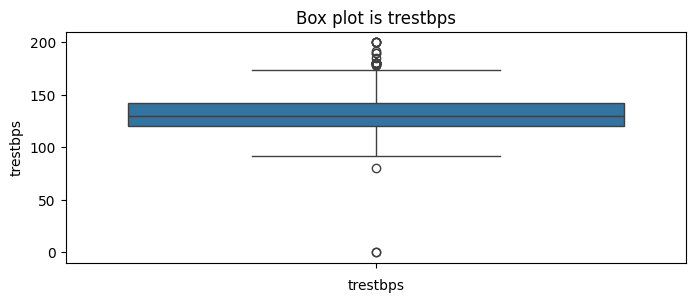

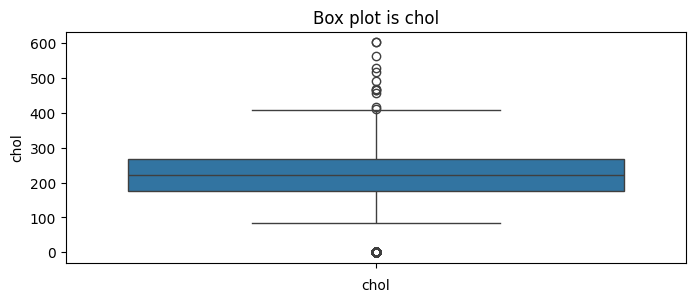

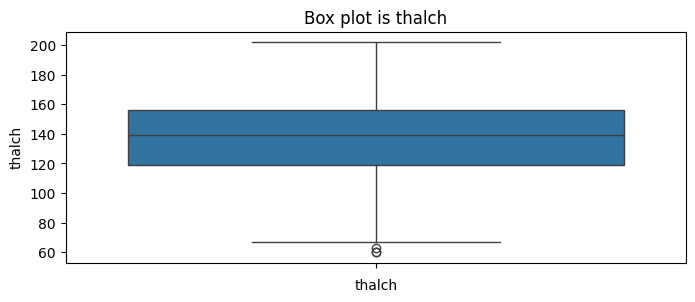

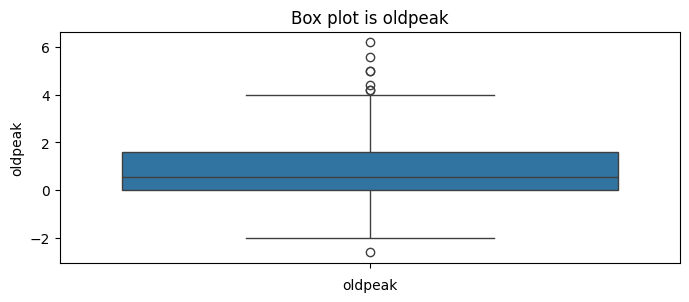

In [13]:
# showing Outlier with numeric Data
for i in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(data=df,y=i)
    plt.title(f"Box plot is {i}")
    plt.xlabel(i)



In [14]:
#to remove where patience treestbps ==0
df = df[df['trestbps']!=0]

In [15]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [16]:
list = ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
for i in list:
    fig1 = px.box(data_frame=df,y=i)
    fig1.show()


In [17]:
df.shape

(918, 16)

### Exploratory Data Analysis

Explore Each column on Dataset

In [18]:
# Exploring Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        918 non-null    float64
 1   age       918 non-null    float64
 2   sex       918 non-null    object 
 3   dataset   918 non-null    object 
 4   cp        918 non-null    object 
 5   trestbps  918 non-null    float64
 6   chol      918 non-null    float64
 7   fbs       918 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    918 non-null    float64
 10  exang     918 non-null    object 
 11  oldpeak   918 non-null    float64
 12  slope     918 non-null    object 
 13  ca        918 non-null    object 
 14  thal      918 non-null    object 
 15  num       918 non-null    float64
dtypes: float64(7), object(9)
memory usage: 121.9+ KB


In [19]:
#id Column
df['id'].min(), df['id'].max()

(1.0, 920.0)

### Lest Explore 1 age column

In [20]:
# Age Column
df['age'].min(),df['age'].max()

(28.0, 77.0)

In [21]:
df['age'].describe()

,age
count,918.000000
mean,53.508715
std,9.434815
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [22]:
print(f"The Error :  - {df['age'].isnull().sum()}")

The Error :  - 0


mean 53.50871459694989
median 54.0
mode 54.0


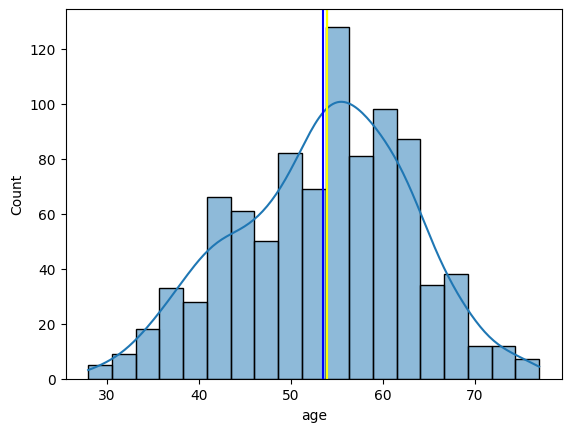

In [23]:
#HIstplot
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(),color='blue')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='yellow')

print("mean", df['age'].mean())
print("median" , df['age'].median())
print("mode", df['age'].mode()[0])

### Lets  Explor    e2  sex     column

In [24]:
df['sex'].describe()

,sex
count,918
unique,2
top,Male
freq,724


In [25]:
print(f"The error {df['sex'].isnull().sum()}")

The error 0


In [26]:
#plot the histogram by plotly and coloring

fig  = px.histogram(data_frame=df,x='age',color='sex')
fig

In [27]:
#Now calculate the percentage of male and female in Data
# for  code optimization we code in dynamic
male_count = df['sex'].value_counts()[0]
#Female Count
female_count = df['sex'].value_counts()[1]
# total
total =  df['sex'].value_counts().sum()
# Percentage of female
percent_male =  (male_count/total) *100

#Percetage of female
percent_female  = (female_count/total) * 100


print(f"Percentage of Male {percent_male:2f}%")

print(f"percent of female : {percent_female :2f}%")

Percentage of Male 78.867102%
percent of female : 21.132898%


In [28]:
df.groupby('sex')['age'].value_counts()

sex     age 
Female  54.0    15
        51.0    11
        62.0    10
        43.0     9
        48.0     9
                ..
Male    77.0     2
        28.0     1
        31.0     1
        33.0     1
        76.0     1
Name: count, Length: 91, dtype: int64

### Lets Explore    3   Dataset Column

In [29]:
#Lets on dataset column

In [30]:
df['dataset'].describe()

,dataset
count,918
unique,4
top,Cleveland
freq,304


In [31]:
print("The Null value : - ",df['dataset'].isnull().sum())

The Null value : -  0


In [32]:
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,198
Switzerland,123


In [33]:
#plot with plotly

fig = px.bar(data_frame=df , x='dataset',color='sex')
fig.show()

print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    192
        Switzerland      113
Name: count, dtype: int64


In [34]:
# make a histgram and colorign by sex

fig  = px.histogram(data_frame=df,x='age',color='dataset')
fig

### Lets Explore    4   CP columns

In [35]:
df['cp'].value_counts()

,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,174
typical angina,46


In [36]:
#Lets plot
fig  = px.histogram(data_frame=df,x='age',color='cp')
fig

<Axes: xlabel='cp', ylabel='count'>

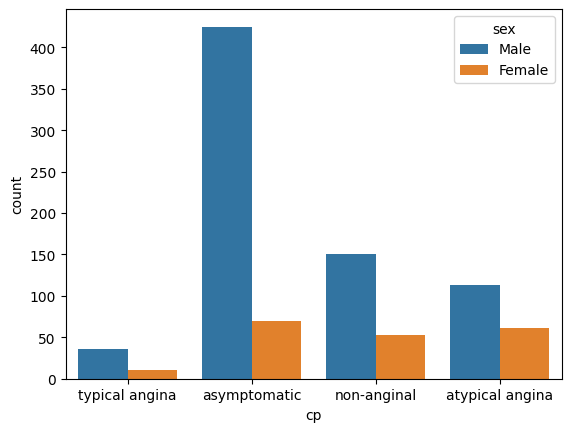

In [37]:
#Count plot]
sns.countplot(data=df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

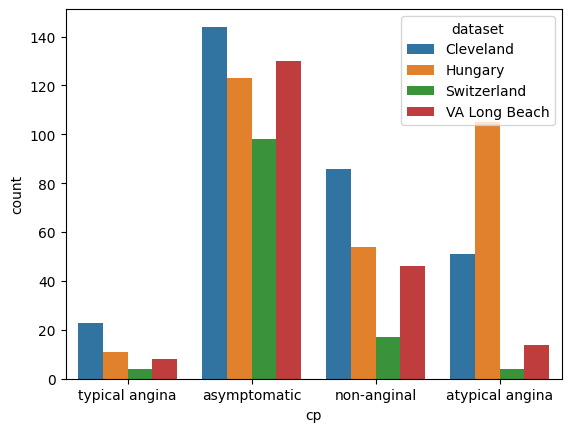

In [38]:
#Count plot]
sns.countplot(data=df,x='cp',hue='dataset')

### lets Explore 5 trestbps column

In [39]:
#See Stats of treestbps
df['trestbps'].describe()

,trestbps
count,918.000000
mean,132.545752
std,18.945931
min,80.000000
25%,120.000000
50%,130.000000
75%,142.000000
max,200.000000


<Axes: xlabel='trestbps', ylabel='Count'>

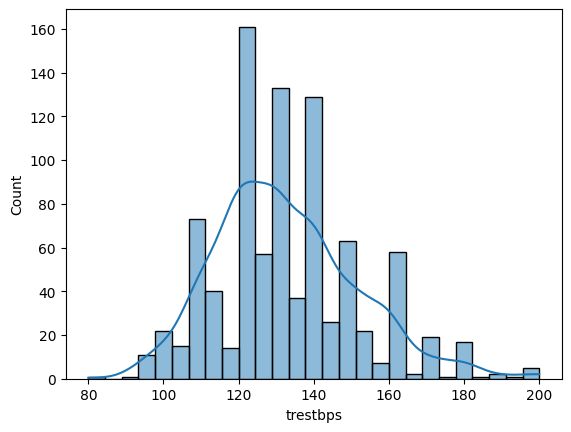

In [40]:
#create histogram of  trestbps

sns.histplot(data=df['trestbps'],kde=True)

In [41]:
#deals with Missing values
df['trestbps'].isnull().mean() *100

np.float64(0.0)

In [42]:
#Now impute the missng Value
imputer =IterativeImputer(max_iter=10 ,  random_state = 42)

df["trestbps"] =    imputer.fit_transform(df[['trestbps']])


#check null values

df['trestbps'].isnull().mean()

np.float64(0.0)

In [43]:
fig = px.histogram(data_frame=df,x='trestbps',color='age')
fig.show()

In [44]:
df[ "trestbps"  ].describe()

,trestbps
count,918.000000
mean,132.545752
std,18.945931
min,80.000000
25%,120.000000
50%,130.000000
75%,142.000000
max,200.000000


In [45]:
#   groiuping age behalf of treestbps
print(df.groupby('age')['trestbps'].value_counts())

age   trestbps
28.0  130.0       1
29.0  120.0       1
      130.0       1
      140.0       1
30.0  170.0       1
                 ..
75.0  170.0       1
76.0  104.0       1
      140.0       1
77.0  124.0       1
      125.0       1
Name: count, Length: 508, dtype: int64


In [46]:
#Grouping sex behalf of trestbps
print(df.groupby('sex')['trestbps'].value_counts())

sex     trestbps
Female  120.0       32
        130.0       31
        140.0       18
        150.0       13
        110.0       11
                    ..
Male    123.0        1
        129.0        1
        164.0        1
        185.0        1
        192.0        1
Name: count, Length: 97, dtype: int64


### Lets Explore 6   chol

In [47]:
df['chol' ].describe()

,chol
count,918.000000
mean,200.898693
std,110.718283
min,0.000000
25%,175.250000
50%,223.000000
75%,269.000000
max,603.000000


In [48]:
df.groupby('age')['chol'].value_counts(ascending=True)

age   chol 
28.0  132.0    1
29.0  132.0    1
      204.0    1
      243.0    1
30.0  237.0    1
              ..
75.0  310.0    1
76.0  170.0    1
      197.0    1
77.0  171.0    1
      304.0    1
Name: count, Length: 728, dtype: int64

In [49]:
#PLot Histogram based on Age
px.histogram(data_frame=df,x='chol',color='age')

In [50]:
px.histogram(data_frame=df,x='chol',color='sex')

In [51]:
# To see a chol Based on dataset
px.histogram(data_frame=df,x='chol',color='dataset')

### Let's Explore 7 fbs

In [52]:
df['fbs'].value_counts()

,count
fbs,
False,690
True,138
nan,90


In [53]:
df.groupby('fbs')['sex'].value_counts()

fbs    sex   
False  Male      526
       Female    164
True   Male      119
       Female     19
nan    Male       79
       Female     11
Name: count, dtype: int64

In [54]:
px.histogram(data_frame=df,x='fbs',color='sex')

### Lets Explore  8  restecg

In [55]:
#check nan
df[df['restecg']=='nan']

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,572.0,55.0,Male,Hungary,typical angina,140.0,295.0,False,nan,136.0,False,0.0,nan,0.0,nan,1.0
598,599.0,34.0,Male,Switzerland,asymptomatic,115.0,0.0,nan,nan,154.0,False,0.2,upsloping,0.0,nan,1.0


In [56]:
# Lets Remove  columns which contains nan
df =  df[df['restecg']  !='nan']

In [57]:
df['restecg'].value_counts()

,count
restecg,
normal,550
lv hypertrophy,188
st-t abnormality,178


In [58]:
df.groupby('restecg')['sex'].value_counts()

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      431
                  Female    119
st-t abnormality  Male      150
                  Female     28
Name: count, dtype: int64

In [59]:
px.histogram(data_frame=df,x='restecg',color='sex')

### Let's Explore  9 thalch

In [60]:
df['thalch'].value_counts()

,count
thalch,
150.0,46
140.0,43
120.0,39
130.0,33
160.0,28
...,...
63.0,1
104.0,1
67.0,1


In [61]:
df.groupby('thalch')['sex'].value_counts(ascending=False)

,,count
thalch,sex,
60.0,Male,2
63.0,Male,1
67.0,Male,1
69.0,Male,2
70.0,Male,1
...,...,...
190.0,Male,1
192.0,Female,1
194.0,Male,1


In [62]:
px.histogram(data_frame=df,x= 'thalch',color='sex')

<Axes: xlabel='thalch', ylabel='Count'>

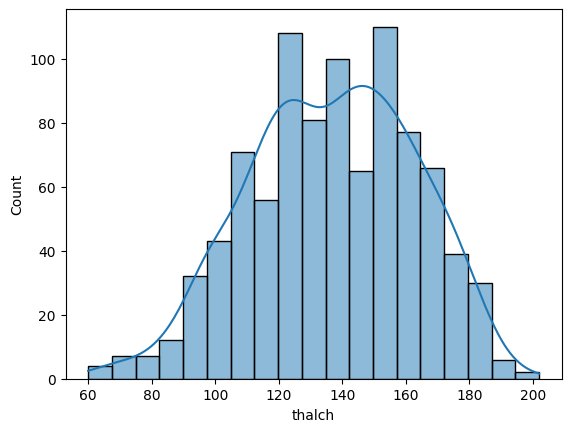

In [63]:
sns.histplot(df['thalch'],kde=True)

### Lets Explore 10  exang

In [64]:
# Lets Check count values
df['exang'].value_counts()

,count
exang,
False,525
True,337
nan,54


In [65]:
#Checking nan values
df[df['exang'] == 'nan']

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
393,394.0,48.0,Female,Hungary,atypical angina,130.0,308.0,False,st-t abnormality,145.0,nan,2.0,upsloping,0.0,nan,0.0
714,715.0,69.0,Male,Switzerland,asymptomatic,140.0,0.0,False,st-t abnormality,157.0,nan,3.7,nan,3.0,reversable defect,3.0
733,734.0,63.0,Male,VA Long Beach,non-anginal,100.0,0.0,False,lv hypertrophy,114.0,nan,-0.9,nan,3.0,nan,1.0
743,744.0,74.0,Male,VA Long Beach,non-anginal,160.0,0.0,False,normal,133.0,nan,1.6,nan,2.0,nan,0.0
746,747.0,51.0,Male,VA Long Beach,asymptomatic,95.0,0.0,True,st-t abnormality,60.0,nan,2.0,nan,0.0,nan,2.0
749,750.0,55.0,Male,VA Long Beach,non-anginal,136.0,228.0,False,st-t abnormality,110.0,nan,1.5,nan,1.0,nan,3.0
756,757.0,60.0,Male,VA Long Beach,asymptomatic,135.0,281.0,False,st-t abnormality,130.0,nan,3.0,nan,2.0,nan,2.0
758,759.0,58.0,Male,VA Long Beach,asymptomatic,110.0,203.0,True,normal,110.0,nan,3.0,nan,3.0,nan,1.0
764,765.0,57.0,Male,VA Long Beach,asymptomatic,160.0,277.0,True,st-t abnormality,110.0,nan,3.0,nan,3.0,nan,4.0
771,772.0,63.0,Female,VA Long Beach,atypical angina,126.0,0.0,False,normal,133.0,nan,3.0,nan,2.0,nan,0.0


In [66]:
# removes all rows where contains nan
df = df[df['exang'] !='nan']

In [67]:
df['exang'].value_counts()

,count
exang,
False,525
True,337


In [68]:
#lets Draw histplot
px.histogram(data_frame=df,x='exang',color='sex')

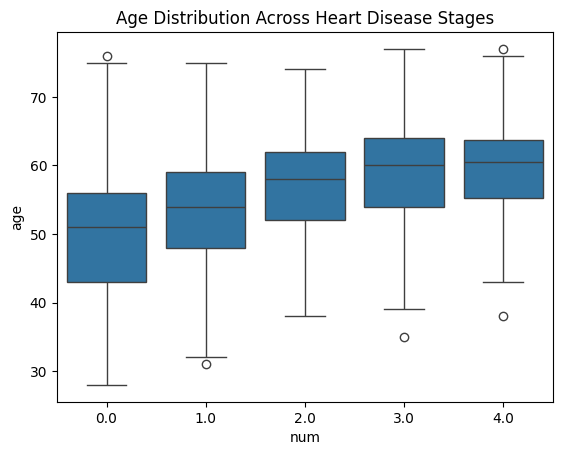

In [69]:
### Lets Explore num Target Varables

sns.boxplot(x=df["num"], y=df["age"])
plt.title("Age Distribution Across Heart Disease Stages")
plt.show()


#### Output

1 - Minimum age is 28 , maximum Age is 77
2   most  Heart decease in 53.0 54.0 age

3 - Most of thew male or female are decease at 54-55 years


4 - Percentage of Male 78.913043%

5  - percent of female : 21.086957%


6 - We are higher no. of patience from Cleveland And Smaller no. of Patience Data from SwitzerLand

7 - Highest no of female in Dataset  at  Cleveland    &  Smallest no. female on Dataset in VA Long Beach\
    1 -  Highest no of Female in Dataset  at  Cleveland is 97   \
    2 - Smallest no of Female in dataset at VA Long Beach is 6

8. Highest no of Male in Dataset  at  Hungry    &  Smallest no. Male on Dataset in Switzerland
   1. Highest no of Male in Dataset  at  Hungry  is 97   
   2. Smallest no of Male in dataset at Switzerland  is 113

`9.How Deal wit Ootlier step by step`


10. Max  rate of trestbps at age 28.0    is  130.0
11. min rate of trestbps at age  77.0  is   126
12. treestbps limit in Female 120  - 110
13. Trestbps limit in MAle 123 -192


14. Chol level min     200 and MAximum 603 in dataset
15. chol in Female  200 -229
16. chol in Male    220 - 239

17. Maximum Dataset are Switzerland  & min LA long Beach




    




## Machine Learning

In [70]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,436.794664,53.153132,132.314385,201.098608,137.508121,0.879234,0.970998
std,256.761201,9.386264,18.531945,111.041666,25.958455,1.090311,1.129416
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,216.250000,46.000000,120.000000,177.000000,120.000000,0.000000,0.000000
50%,432.500000,54.000000,130.000000,224.000000,140.000000,0.500000,1.000000
75%,649.750000,60.000000,140.000000,268.000000,157.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        862 non-null    float64
 1   age       862 non-null    float64
 2   sex       862 non-null    object 
 3   dataset   862 non-null    object 
 4   cp        862 non-null    object 
 5   trestbps  862 non-null    float64
 6   chol      862 non-null    float64
 7   fbs       862 non-null    object 
 8   restecg   862 non-null    object 
 9   thalch    862 non-null    float64
 10  exang     862 non-null    object 
 11  oldpeak   862 non-null    float64
 12  slope     862 non-null    object 
 13  ca        862 non-null    object 
 14  thal      862 non-null    object 
 15  num       862 non-null    float64
dtypes: float64(7), object(9)
memory usage: 114.5+ KB


In [72]:
# Lets know about Target Varible like num
df['num'].value_counts()

,count
num,
0.0,391
1.0,250
2.0,102
3.0,93
4.0,26


##### IN my Target varable `num`

`0=  no heart decease`
`1 = mild heart disease`
`2 = moderate heart dicease`
`3 = severe heart decease`
`4 - crttical heart disease`

0. no heart decease
1 = mild heart disease
2 = moderate heart dicease
3 = severe heart decease
4 - crttical heart disease

In [73]:
# For Training Machine Learning Model We drop id
df = df.drop('id', axis=1)

In [74]:





# Split Data into x, y
x = df.drop('num', axis=1)
y = df['num']



# Initialize dictionary to store encoders
label_encoders = {}

# Encode categorical features
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'category':
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])
        label_encoders[col] = le  # Store encoder for reverse transformation

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Data successfully preprocessed and split!")


Data successfully preprocessed and split!


In [75]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
   #"Naive Bayes": GaussianNB(),
   "XGBoost":XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
   #"LightGBM": lgb.LGBMClassifier(random_state=42)
}
best_score = 0
best_model_name =  None
model_result = []
for name,model in models.items():
   model.fit(x_train,y_train)
   y_pred = model.predict(x_test)
   accuracy = accuracy_score(y_test,y_pred)
   report = classification_report(y_test, y_pred, output_dict=True)

   model_result.append({
    'name': name,
    'accuracy': accuracy,



   }
   )

if accuracy > best_score:
        best_score = accuracy
        best_model = model
        best_model_name = name

#oblib.dump(model,"best_heart_dicease_prediction_model.pkl")


# Convert results to DataFrame
results_df = pd.DataFrame(model_result)


In [76]:
results_df.sort_values(by="accuracy",ascending=False)

,name,accuracy
3,Gradient Boosting,0.658960
6,XGBoost,0.647399
1,Random Forest,0.612717
0,Logistic Regression,0.606936
5,Decision Tree,0.589595
4,KNN,0.497110
2,SVM,0.468208


# Lets Increase the Model Accuracy #


Dropped 0 duplicate rows.

Categorical Columns: []


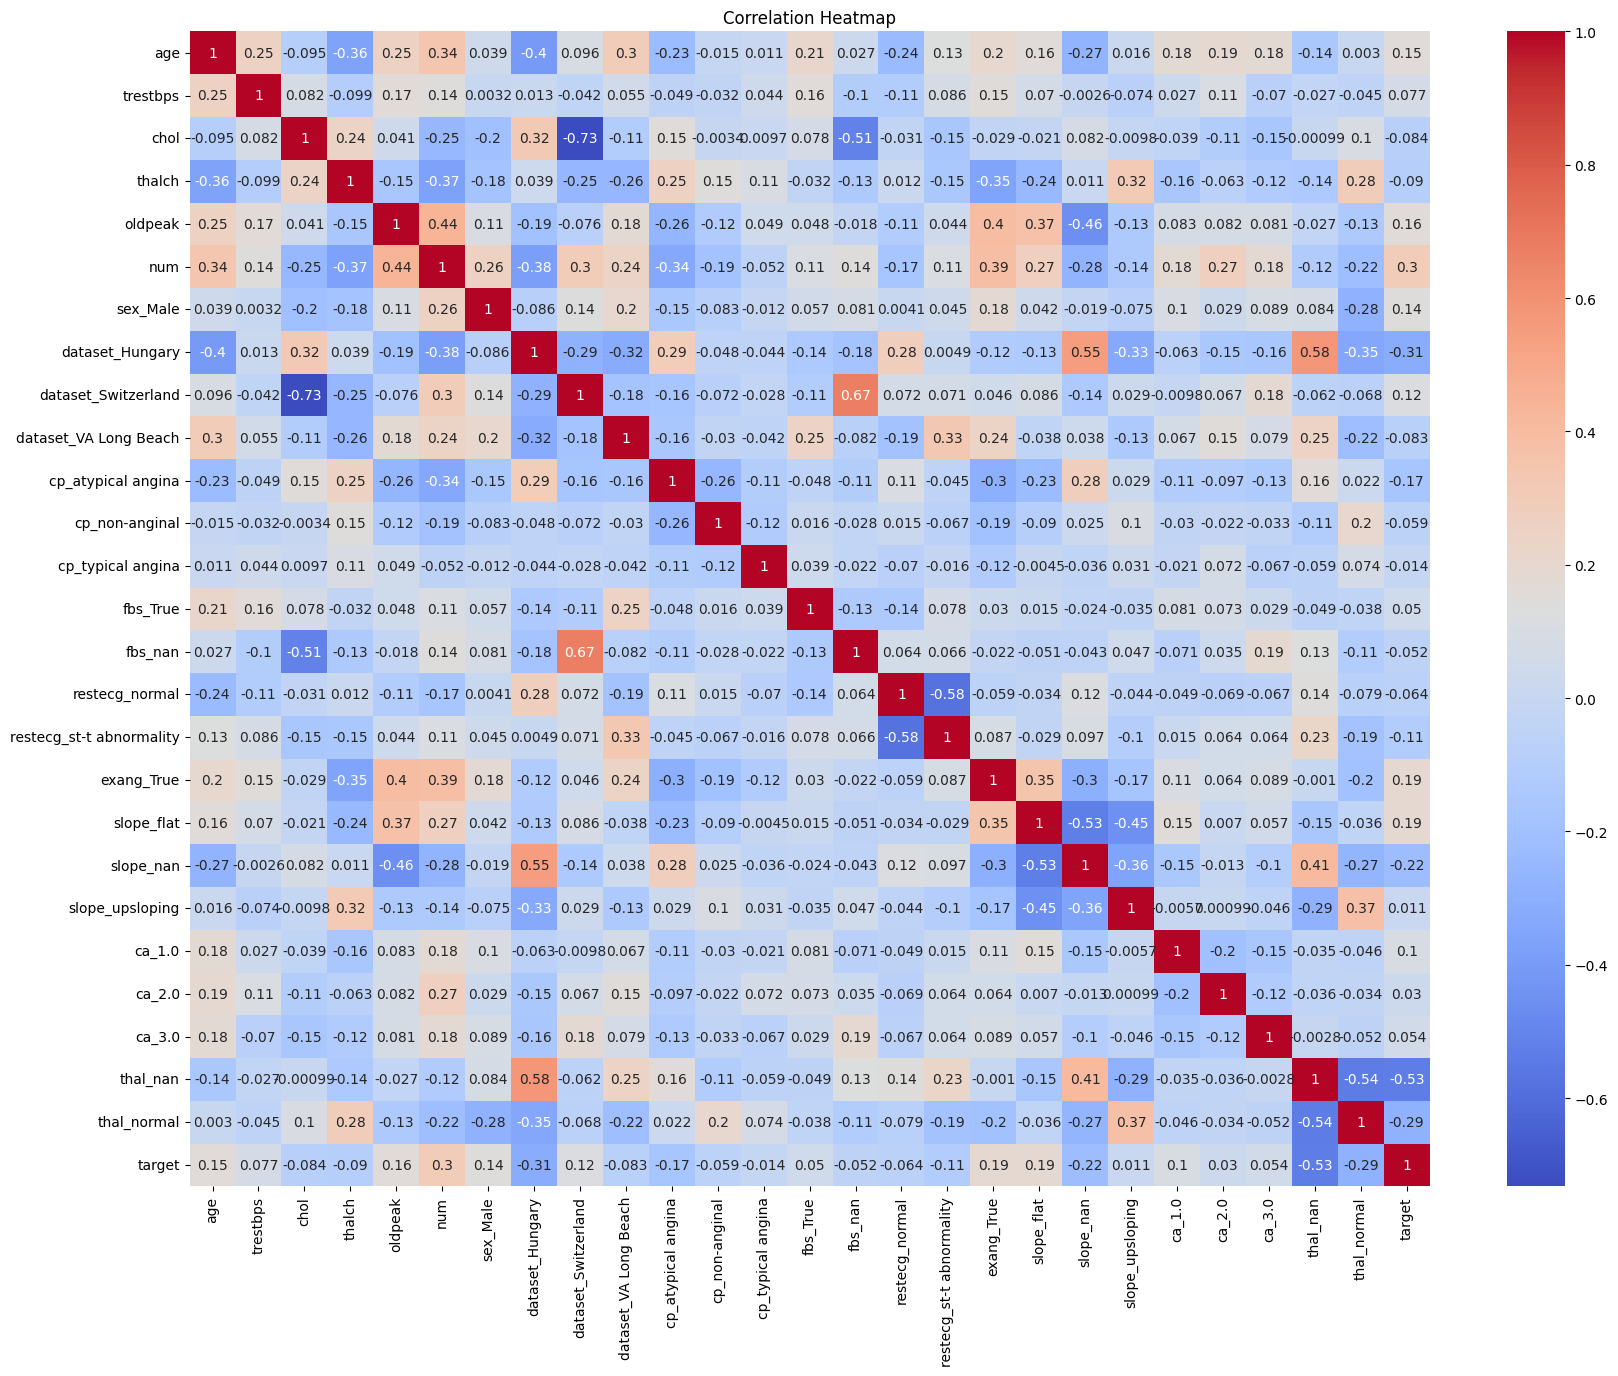


Initial Random Forest Model Accuracy: 95.35%
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Model Accuracy: 96.51%

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.97      0.98       134
        True       0.90      0.95      0.92        38

    accuracy                           0.97       172
   macro avg       0.94      0.96      0.95       172
weighted avg       0.97      0.97      0.97       172


Logistic Regression Model Accuracy: 95.93%

Final model meets the target accuracy of 86%.


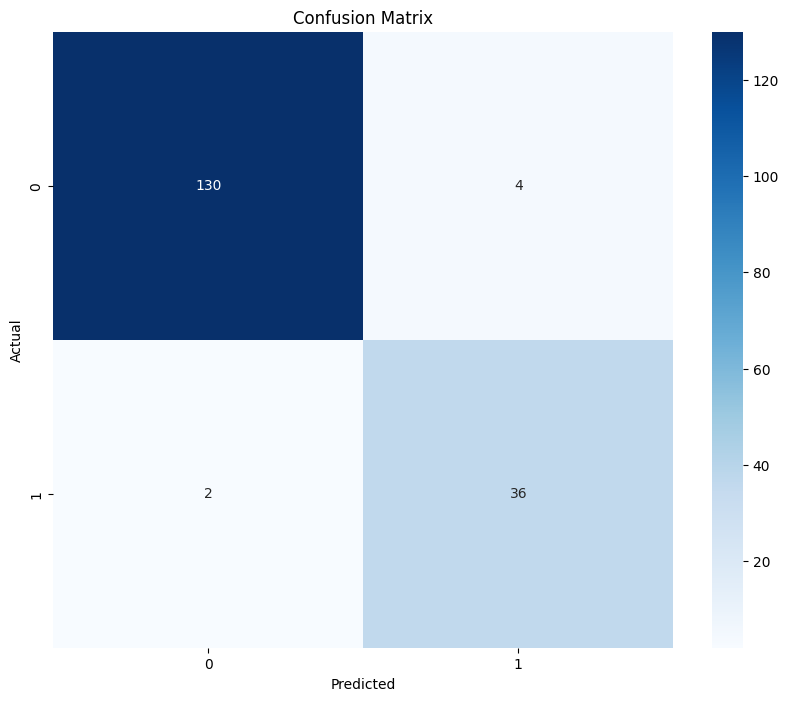

['best_rf_model.pkl']

In [82]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing, modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Suppress warnings for a cleaner notebook
import warnings
warnings.filterwarnings("ignore")






# Fill missing values if they exist
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Drop duplicate rows if any
before_duplicates = df.shape[0]
df.drop_duplicates(inplace=True)
after_duplicates = df.shape[0]
print(f"\nDropped {before_duplicates - after_duplicates} duplicate rows.")

# ------------------------------
# 3. Encode Categorical Variables
# ------------------------------
# Identify object type columns which are typically categorical
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())

# Encode these categorical columns using one-hot encoding
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("Applied one-hot encoding to categorical variables.")

# ------------------------------
# 4. Exploratory Data Analysis (Optional)
# ------------------------------

# Plot correlation heatmap to see relationships
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------
# 5. Feature Scaling and Data Splitting
# ------------------------------

# Separate features and target.
# Here we assume the target column is named 'target'. If it is named differently,
# adjust accordingly. For instance, if it's the last column:
if 'target' not in df.columns:
    target_column = df.columns[-1]
    df.rename(columns={target_column: 'target'}, inplace=True)

X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset with stratification to preserve target distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------
# 6. Model Building and Tuning
# ------------------------------

# Initial Random Forest model training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nInitial Random Forest Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("\nBest Parameters:", grid_rf.best_params_)

# Evaluate the tuned model
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_best)
print("\nTuned Random Forest Model Accuracy: {:.2f}%".format(acc*100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# ------------------------------
# 7. Optional: Compare with Logistic Regression
# ------------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("\nLogistic Regression Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr)*100))

# ------------------------------
# 8. Final Model Selection and Saving the Notebook
# ------------------------------

if acc >= 0.86:
    print("\nFinal model meets the target accuracy of 86%.")
else:
    print("\nFinal model did not meet the target accuracy. Consider additional tuning or feature engineering.")

# Plot confusion matrix for the final model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------
# 9. Save the Model (Optional)
# ------------------------------
import joblib
joblib.dump(best_rf, 'best_rf_model.pkl')



# After Tuned the Model Accuracy to be 96.51%

# Thank you


In [83]:
# prompt: Save the model and any thing related to be used in deployment like streamlit app

import joblib

# Assuming 'best_rf' is your best performing model from the previous code
# Save the model
joblib.dump(best_rf, 'best_rf_model.pkl')

# Save the label encoders (important for deployment)
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save the StandardScaler (important for deployment)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
# prompt: deploy this model in streamlit perfictly using the input features and leave space for some more models

!pip install streamlit
!pip install joblib
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

import streamlit as st
import joblib
import pandas as pd
import numpy as np

In [ ]:
# Load the trained model and preprocessing objects
model = joblib.load('best_rf_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scaler.pkl')


In [ ]:
def preprocess_input(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Apply label encoding
    for col, le in label_encoders.items():
        if col in input_df.columns:
          try:
            input_df[col] = le.transform(input_df[col])
          except ValueError as e:
            st.error(f"Invalid input for {col}: {e}")
            return None


    # Apply one-hot encoding (if needed) - Modify based on your encoding
    # categorical_cols = ['col1', 'col2'] # Replace with your actual categorical columns
    # input_df = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

    # Feature scaling
    input_scaled = scaler.transform(input_df)

    return input_scaled

In [ ]:
def predict_heart_disease(input_data):
    processed_data = preprocess_input(input_data)
    if processed_data is not None:
      prediction = model.predict(processed_data)[0]
      return prediction
    else:
      return None

In [84]:
def main():

    st.title("Heart Disease Prediction App")

    # Input Feature placeholders
    st.header("Input Features")
    age = st.number_input("Age", min_value=0, max_value=100, value=50)
    sex = st.selectbox("Sex", ["Male", "Female"])  # Ensure you've encoded this as 0 or 1
    cp = st.selectbox("Chest Pain Type", ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])
    trestbps = st.number_input("Resting Blood Pressure", min_value=0, value=120)
    chol = st.number_input("Cholesterol", min_value=0, value=200)
    # ... other input features (add all features here)


    # Placeholder for future model options
    #st.sidebar.header("Select Model")

    # Prediction
    if st.button("Predict"):
        input_data = {
            'age': age,
            'sex': sex,
            'cp': cp,
            'trestbps': trestbps,
            'chol':chol,
            # ... Include all features here, matching the order used in training
        }
        prediction = predict_heart_disease(input_data)
        if prediction is not None:
          st.header("Prediction")
          st.write(f"Predicted Heart Disease Class: {prediction}")


if __name__ == "__main__":
    main()


2025-05-09 09:12:18.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:12:18.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [85]:
!pip install streamlit
!pip install joblib
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model and preprocessing objects
model = joblib.load('best_rf_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scaler.pkl')

# Function to preprocess user input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Apply label encoding
    for col, le in label_encoders.items():
      if col in input_df.columns:
          input_df[col] = le.transform(input_df[col])

    # Apply one-hot encoding (if needed, based on your training data)

    # Apply scaling
    input_scaled = scaler.transform(input_df)

    return input_scaled

# Streamlit app
st.title("Heart Disease Prediction")
st.write("Enter the patient's information below:")

# Input fields for user
# ... (add input fields for all features used during training) ...

# Example input fields (replace with your actual features and data types)
age = st.number_input("Age", min_value=0, max_value=120, value=50)
sex = st.selectbox("Sex", ['Male', 'Female'])
cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3]) # Replace with actual values
trestbps = st.number_input("Resting Blood Pressure", value=120)

# .... (add other input fields similarly)


# Create input dictionary
input_data = {
    'age': age,
    'sex': sex,
    'cp': cp,
    'trestbps': trestbps
    # ... (Add other feature key-value pairs) ...
}

# Button to trigger prediction
if st.button("Predict"):
    try:
        # Preprocess the input
        input_scaled = preprocess_input(input_data)

        # Make prediction
        prediction = model.predict(input_scaled)[0]

        # Display prediction
        st.write(f"Prediction: {prediction}")

    except Exception as e:
        st.error(f"An error occurred: {e}")




2025-05-09 09:14:26.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 09:14:26.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar